梯度下降
利用斜率判断方向，然后学习率决定步伐大小

In [1]:
#读取资料
import pandas as pd

url = "Salary_Data.csv"
data = pd.read_csv(url)
data 
# y = w*x + b 
x = data["YearsExperience"]
y = data["Salary"]

In [ ]:
#求梯度封装成函数 
def compute_gradient(x, y, w,b):
    #加总然后求平均
    w_gradient = (x*(w*x +b - y)).mean()
    b_gradient = ((w*x +b -y )).mean()
    return w_gradient ,b_gradient



In [14]:
compute_gradient(x, y,20,10)

(268.54757575757577, 35.084848484848486)

In [10]:
#封装成一个函数，方便带入不同的w和b
def compute_cost(x,y ,w,b):
    y_pred = w*x +b 
    cost = (y-y_pred)**2
    #将所有的cost做和然后平均
    cost = cost.sum() / len(x)
    return cost

In [36]:
#随机初始值
w = 0 
b= 0
learning_rate = 0.001

for i in range(20000):
    w_gradient , b_gradient = compute_gradient(x,y,w,b)

    w= w-w_gradient*learning_rate 
    b =b-b_gradient*learning_rate
    cost = compute_cost(x,y,w,b)
    if i %1000 ==0:
        print(f"leraion{i:5}: Cost: {cost: .4e}, w: {w:.2e}, b: {b:.2e} , w_gradient:{w_gradient: .2e} , b_gradient:{b_gradient: .2e}")


leraion    0: Cost:  5.6568e+03, w: 4.36e-01, b: 7.26e-02 , w_gradient:-4.36e+02 , b_gradient:-7.26e+01
leraion 1000: Cost:  1.4097e+02, w: 1.21e+01, b: 8.07e+00 , w_gradient: 8.00e-01 , b_gradient:-5.32e+00
leraion 2000: Cost:  9.6063e+01, w: 1.14e+01, b: 1.27e+01 , w_gradient: 6.12e-01 , b_gradient:-4.08e+00
leraion 3000: Cost:  6.9732e+01, w: 1.09e+01, b: 1.63e+01 , w_gradient: 4.69e-01 , b_gradient:-3.12e+00
leraion 4000: Cost:  5.4293e+01, w: 1.05e+01, b: 1.91e+01 , w_gradient: 3.59e-01 , b_gradient:-2.39e+00
leraion 5000: Cost:  4.5241e+01, w: 1.02e+01, b: 2.12e+01 , w_gradient: 2.75e-01 , b_gradient:-1.83e+00
leraion 6000: Cost:  3.9933e+01, w: 9.91e+00, b: 2.28e+01 , w_gradient: 2.10e-01 , b_gradient:-1.40e+00
leraion 7000: Cost:  3.6821e+01, w: 9.73e+00, b: 2.40e+01 , w_gradient: 1.61e-01 , b_gradient:-1.07e+00
leraion 8000: Cost:  3.4996e+01, w: 9.59e+00, b: 2.49e+01 , w_gradient: 1.23e-01 , b_gradient:-8.22e-01
leraion 9000: Cost:  3.3926e+01, w: 9.48e+00, b: 2.57e+01 , w_gr

In [42]:
def gradient_descent(x,y,w_init,b_init ,learning_rate , cost_function ,gradient_function , run_liter , p_liter):
    #储存起来
    c_hist = []
    w_hist = []
    b_hist = []

    w = w_init
    b = b_init
    for i in range(run_liter):
        w_gradient , b_gradient = gradient_function(x,y,w,b)

        w= w-w_gradient*learning_rate 
        b =b-b_gradient*learning_rate
        cost = cost_function(x,y,w,b)

        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)

        if i %p_liter ==0:
            print(f"leraion{i:5}: Cost: {cost: .4e}, w: {w:.2e}, b: {b:.2e} , w_gradient:{w_gradient: .2e} , b_gradient:{b_gradient: .2e}")

    return w,b, w_hist ,b_hist , c_hist 

In [43]:
w_final , b_final , w_hist , b_hist , c_hist =gradient_descent(x,y,0,0,1.0e-3,compute_cost,compute_gradient,20000,1000)

leraion    0: Cost:  5.6568e+03, w: 4.36e-01, b: 7.26e-02 , w_gradient:-4.36e+02 , b_gradient:-7.26e+01
leraion 1000: Cost:  1.4097e+02, w: 1.21e+01, b: 8.07e+00 , w_gradient: 8.00e-01 , b_gradient:-5.32e+00
leraion 2000: Cost:  9.6063e+01, w: 1.14e+01, b: 1.27e+01 , w_gradient: 6.12e-01 , b_gradient:-4.08e+00
leraion 3000: Cost:  6.9732e+01, w: 1.09e+01, b: 1.63e+01 , w_gradient: 4.69e-01 , b_gradient:-3.12e+00
leraion 4000: Cost:  5.4293e+01, w: 1.05e+01, b: 1.91e+01 , w_gradient: 3.59e-01 , b_gradient:-2.39e+00
leraion 5000: Cost:  4.5241e+01, w: 1.02e+01, b: 2.12e+01 , w_gradient: 2.75e-01 , b_gradient:-1.83e+00
leraion 6000: Cost:  3.9933e+01, w: 9.91e+00, b: 2.28e+01 , w_gradient: 2.10e-01 , b_gradient:-1.40e+00
leraion 7000: Cost:  3.6821e+01, w: 9.73e+00, b: 2.40e+01 , w_gradient: 1.61e-01 , b_gradient:-1.07e+00
leraion 8000: Cost:  3.4996e+01, w: 9.59e+00, b: 2.49e+01 , w_gradient: 1.23e-01 , b_gradient:-8.22e-01
leraion 9000: Cost:  3.3926e+01, w: 9.48e+00, b: 2.57e+01 , w_gr

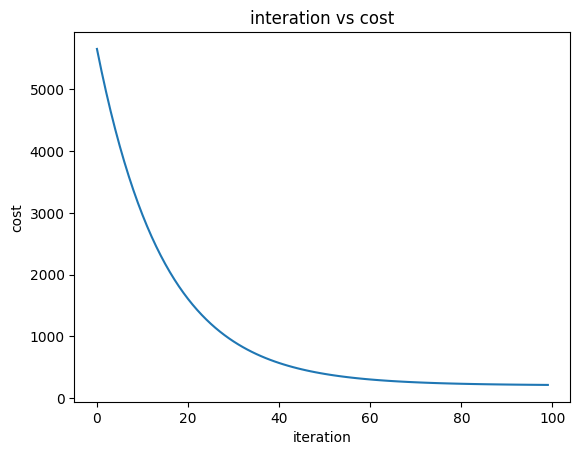

In [55]:
#画图
import matplotlib.pyplot as plt
import numpy as np 

plt.plot(np.arange(0,100) ,c_hist[:100] )
plt.title("interation vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [46]:
print(f"最终的w b = ({w_final: .2f} {b_final: .2f})")

最终的w b = ( 9.14  27.89)


In [51]:
#现在就拿算出来的值w,b 做预测
print(f"年资3.5 , 薪水有： {w_final*3.5 + b_final:.1f}K")
print(f"年资5.9 , 薪水有： {w_final*5.9 + b_final:.1f}K")

年资3.5 , 薪水有： 59.9K
年资5.9 , 薪水有： 81.8K


In [ ]:
ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201)) #这个矩阵用来存放不同的w和不同的b的时候的cost

#将结果存放进去
i =0 
for w in ws:
    j = 0
    for b in bs:
        cost = compute_cost(x,y,w,b)
        costs[i,j] = cost
        j+=1
    i+=1

In [58]:
#添加中文
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mlp.rc("font",family="ChineseFont")

In [72]:
w_final , b_final , w_hist , b_hist , c_hist =gradient_descent(x,y,-100,-100,1.0e-3,compute_cost,compute_gradient,10000,1000)

leraion    0: Cost:  5.0753e+05, w: -9.58e+01, b: -9.93e+01 , w_gradient:-4.20e+03 , b_gradient:-6.61e+02
leraion 1000: Cost:  1.9382e+03, w: 2.17e+01, b: -5.56e+01 , w_gradient: 3.35e+00 , b_gradient:-2.23e+01
leraion 2000: Cost:  1.1499e+03, w: 1.87e+01, b: -3.60e+01 , w_gradient: 2.57e+00 , b_gradient:-1.71e+01
leraion 3000: Cost:  6.8762e+02, w: 1.65e+01, b: -2.10e+01 , w_gradient: 1.96e+00 , b_gradient:-1.31e+01
leraion 4000: Cost:  4.1658e+02, w: 1.48e+01, b: -9.51e+00 , w_gradient: 1.50e+00 , b_gradient:-1.00e+01
leraion 5000: Cost:  2.5766e+02, w: 1.34e+01, b: -7.18e-01 , w_gradient: 1.15e+00 , b_gradient:-7.67e+00
leraion 6000: Cost:  1.6448e+02, w: 1.24e+01, b: 6.01e+00 , w_gradient: 8.82e-01 , b_gradient:-5.87e+00
leraion 7000: Cost:  1.0985e+02, w: 1.17e+01, b: 1.12e+01 , w_gradient: 6.75e-01 , b_gradient:-4.50e+00
leraion 8000: Cost:  7.7815e+01, w: 1.11e+01, b: 1.51e+01 , w_gradient: 5.17e-01 , b_gradient:-3.44e+00
leraion 9000: Cost:  5.9033e+01, w: 1.06e+01, b: 1.81e+01

当 w = [9], b= [29]时,有最小的cost: [32.69484848]


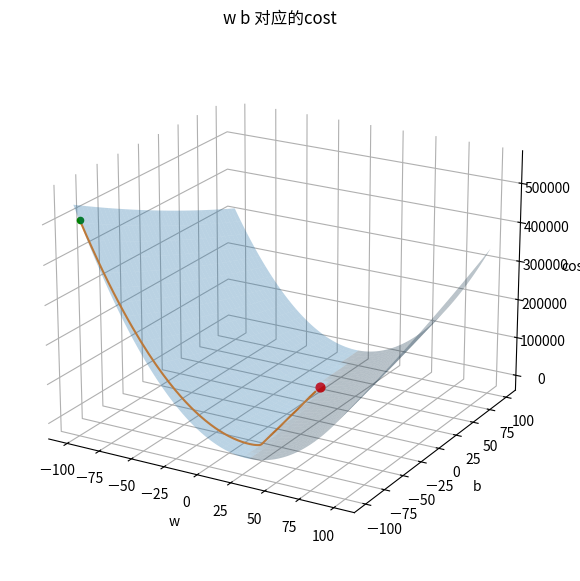

In [73]:
#同时考虑w和b画图，图是3D
plt.figure(figsize=(7,7))#初始设定图的宽度和高度
ax = plt.axes(projection="3d")

#旋转3D图,第一个上下旋转角度，第二个左右的旋转角度
ax.view_init(20.65)

#用来将背景变成白色美观
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))


b_grid,w_grid = np.meshgrid(bs,ws)#用来产生网格

#绘制图形
ax.plot_surface(w_grid,b_grid, costs  , alpha = 0.3)
# ax.plot_wireframe(w_grid , b_grid ,costs, color="black",alpha = 0.1)
ax.set_title("w b 对应的cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")
#找出最低的点
w_index,b_index = np.where(costs ==np.min((costs)))
print(f"当 w = {ws[w_index]}, b= {bs[b_index]}时,有最小的cost: {costs[w_index,b_index]}")
ax.scatter(ws[w_index] , bs[b_index] , costs[w_index , b_index] , color = "red" , s = 40)
ax.scatter(w_hist[0],b_hist[0],c_hist[0],color="green")
ax.plot(w_hist , b_hist ,c_hist)
plt.show()

#机器学习总结
流程：
准备好资料
设定一个模型
调整参数的评判标准: cost_function 
optimizer优化器  ：gradient_descent梯度下降
